# The Flight Ticket Price Prediction (Hackathon)

#### Overview
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.     Size of training set: 10683 records Size of test set: 2671 records FEATURES: Airline: The name of the airline. Date_of_Journey: The date of the journey Source: The source from which the service begins. Destination: The destination where the service ends. Route: The route taken by the flight to reach the destination. Dep_Time: The time when the journey starts from the source. Arrival_Time: Time of arrival at the destination. Duration: Total duration of the flight. Total_Stops: Total stops between the source and destination. Additional_Info: Additional information about the flight Price: The price of the ticket

#### Data
* Data_Train.xlsx
* Test_set.xlsx

Data Source : https://www.machinehack.com/hackathons/predict_the_flight_ticket_price_hackathon/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [3]:
train_df = pd.read_excel("C:/Users/kakadiya/Downloads/machinehack.com/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")
test_df = pd.read_excel("C:/Users/kakadiya/Downloads/machinehack.com/Flight_Ticket_Participant_Datasets/Test_set.xlsx")

In [4]:
print(train_df.shape)
train_df.head()

(10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
print(test_df.shape)
test_df.head()

(2671, 10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Exploratory Data Analysis (EDA) & Data wrangling (Featuring Engineering)

### Training Dataset : train_df

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# Row with NaN/non-null values.
train_df[train_df.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
# drop row with NaN/non-null values.
train_df.dropna(inplace = True)

train_df.reset_index(drop = True, inplace = True)

# checking if there is any NaN/non-null row or not.
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
# converting ['Date_of_Journey'] from 'object' to 'datetime64'.
train_df['Date_of_Journey']=pd.to_datetime(train_df['Date_of_Journey'])

# dropping column ['Route'].
train_df.drop(['Route'],axis=1,inplace=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Dep_Time         10682 non-null  object        
 5   Arrival_Time     10682 non-null  object        
 6   Duration         10682 non-null  object        
 7   Total_Stops      10682 non-null  object        
 8   Additional_Info  10682 non-null  object        
 9   Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 834.7+ KB


In [10]:
train_df.tail()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10677,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,2019-01-03,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648
10681,Air India,2019-09-05,Delhi,Cochin,10:55,19:15,8h 20m,2 stops,No info,11753


### Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder**

**Ordinal data** --> data are in order --> **LabelEncoder**

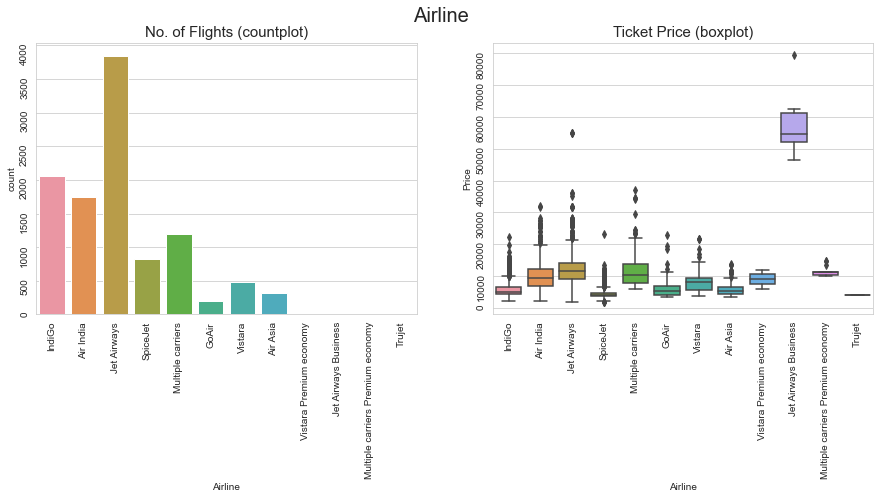

In [11]:
# Airline
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Airline', fontsize = 20)

sns.countplot(ax=axes[0], x='Airline',data=train_df)
axes[0].set_title('No. of Flights (countplot)', fontsize = 15)
axes[0].tick_params(labelrotation=90)

sns.boxplot(ax=axes[1], x='Airline', y='Price' ,data=train_df)
axes[1].set_title('Ticket Price (boxplot)', fontsize = 15)
axes[1].tick_params(labelrotation=90)

In [12]:
from sklearn.preprocessing import OneHotEncoder
One_Hot_Encoder = OneHotEncoder()

# As Source is Nominal Categorical data we will perform OneHotEncoding
Airline = pd.DataFrame(One_Hot_Encoder.fit_transform(train_df[["Airline"]]).toarray())
Airline.columns = One_Hot_Encoder.get_feature_names(['Airline'])
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# splitting ['Date_of_Journey'] into day, week, month, year.
train_df['Day'] = train_df['Date_of_Journey'].dt.day
train_df['Days_of_Week'] = train_df['Date_of_Journey'].dt.day_name()
train_df['Week'] = train_df['Date_of_Journey'].dt.week
train_df['Month'] = train_df['Date_of_Journey'].dt.month
train_df['Year'] = train_df['Date_of_Journey'].dt.year

In [14]:
train_df['Year'].unique()

array([2019], dtype=int64)

In [15]:
train_df.drop(['Year', 'Date_of_Journey'],axis=1,inplace=True)
train_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Days_of_Week,Week,Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,Sunday,12,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,5,Saturday,1,1
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,Friday,36,9
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,5,Thursday,49,12
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,3,Thursday,1,1


Text(0.5, 1.0, 'Ticket Price (boxplot)')

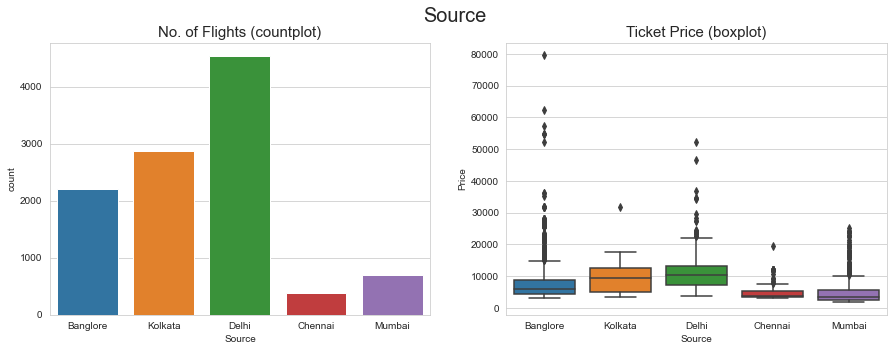

In [16]:
# Source
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Source', fontsize = 20)

sns.countplot(ax=axes[0], x='Source',data=train_df)
axes[0].set_title('No. of Flights (countplot)', fontsize = 15)

sns.boxplot(ax=axes[1], x='Source', y='Price' ,data=train_df)
axes[1].set_title('Ticket Price (boxplot)', fontsize = 15)

In [17]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = pd.DataFrame(One_Hot_Encoder.fit_transform(train_df[["Source"]]).toarray())
Source.columns = One_Hot_Encoder.get_feature_names(['Source'])
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Ticket Price (boxplot)')

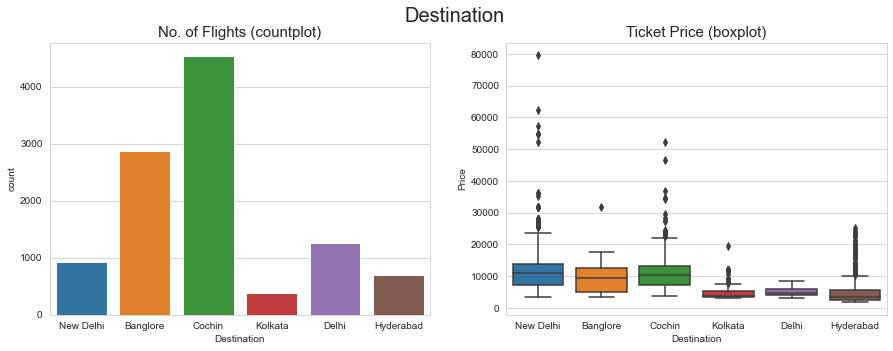

In [18]:
# Destination
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Destination', fontsize = 20)

sns.countplot(ax=axes[0], x='Destination',data=train_df)
axes[0].set_title('No. of Flights (countplot)', fontsize = 15)

sns.boxplot(ax=axes[1], x='Destination', y='Price' ,data=train_df)
axes[1].set_title('Ticket Price (boxplot)', fontsize = 15)

In [19]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.DataFrame(One_Hot_Encoder.fit_transform(train_df[["Destination"]]).toarray())
Destination.columns = One_Hot_Encoder.get_feature_names(['Destination'])
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
# Converting [Dep_Time, Arrival_Time, Duration] into minutes.
train_df.Dep_Time = train_df.Dep_Time.str.split(':').apply(lambda x: int(x[0])*60+int(x[1]))
train_df.Arrival_Time = [ int(x[0])*60+int(x[1])   for x in train_df.Arrival_Time.str.split(' ').str[0].str.split(':')]
train_df['Duration']=train_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [21]:
train_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Days_of_Week,Week,Month
0,IndiGo,Banglore,New Delhi,1340,70,170,non-stop,No info,3897,24,Sunday,12,3
1,Air India,Kolkata,Banglore,350,795,445,2 stops,No info,7662,5,Saturday,1,1
2,Jet Airways,Delhi,Cochin,565,265,1140,2 stops,No info,13882,6,Friday,36,9
3,IndiGo,Kolkata,Banglore,1085,1410,325,1 stop,No info,6218,5,Thursday,49,12
4,IndiGo,Banglore,New Delhi,1010,1295,285,1 stop,No info,13302,3,Thursday,1,1


(Text(0.5, 0, 'Duration in minutes'), Text(0, 0.5, 'Price in Rupees'))

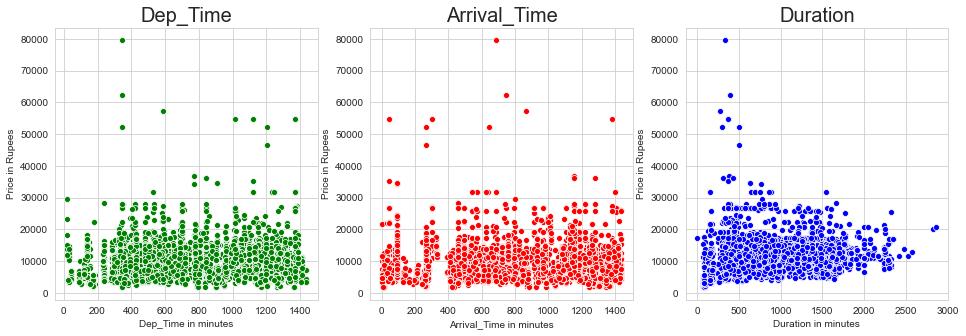

In [22]:
# Dep_Time & Arrival_Time & Duration
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(ax=axes[0], x='Dep_Time', y='Price' ,data=train_df, color='green')
axes[0].set_title('Dep_Time', fontsize = 20)
axes[0].set_xlabel('Dep_Time in minutes'), axes[0].set_ylabel('Price in Rupees')

sns.scatterplot(ax=axes[1], x='Arrival_Time', y='Price' ,data=train_df, color='red')
axes[1].set_title('Arrival_Time', fontsize = 20)
axes[1].set_xlabel('Arrival_Time in minutes'), axes[1].set_ylabel('Price in Rupees')

sns.scatterplot(ax=axes[2], x='Duration', y='Price' ,data=train_df, color='blue')
axes[2].set_title('Duration', fontsize = 20)
axes[2].set_xlabel('Duration in minutes'), axes[2].set_ylabel('Price in Rupees')

In [23]:
train_df['Additional_Info'].value_counts() 

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

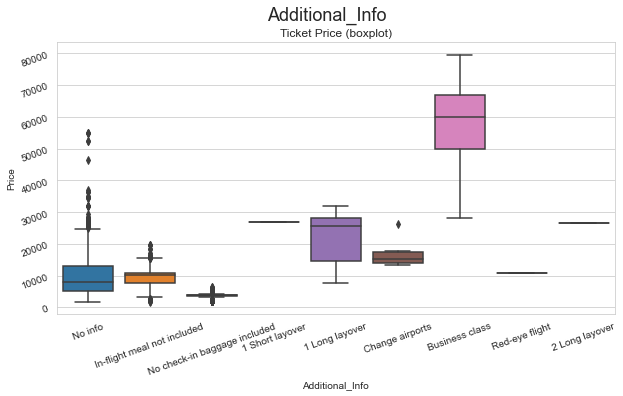

In [24]:
# replacing 'No Info' with 'No info' in dataframe.
train_df.replace('No Info', 'No info', inplace = True)

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Additional_Info', fontsize = 18)

sns.boxplot(x='Additional_Info', y='Price' ,data=train_df)
ax.set_title('Ticket Price (boxplot)', fontsize = 12)
ax.tick_params(labelrotation=20)

<Figure size 1080x1080 with 0 Axes>

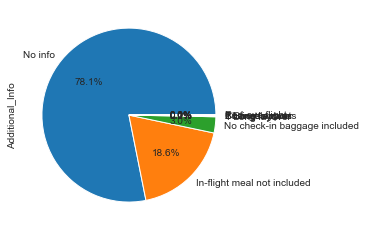

<Figure size 1080x1080 with 0 Axes>

In [25]:
train_df['Additional_Info'].value_counts().plot.pie(autopct="%.1f%%")
plt.figure(figsize=[15,15])

In [26]:
# droppong column 'Additional_Info' as it has 78% 'No info' value and in scatter plot prices are almost overlapping 
# each other except for 'Business class' value which is only 4 in quantity.
train_df.drop(['Additional_Info'], axis=1, inplace=True)
train_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Days_of_Week,Week,Month
0,IndiGo,Banglore,New Delhi,1340,70,170,non-stop,3897,24,Sunday,12,3
1,Air India,Kolkata,Banglore,350,795,445,2 stops,7662,5,Saturday,1,1
2,Jet Airways,Delhi,Cochin,565,265,1140,2 stops,13882,6,Friday,36,9
3,IndiGo,Kolkata,Banglore,1085,1410,325,1 stop,6218,5,Thursday,49,12
4,IndiGo,Banglore,New Delhi,1010,1295,285,1 stop,13302,3,Thursday,1,1


Text(0.5, 1.0, 'Ticket Price (boxplot)')

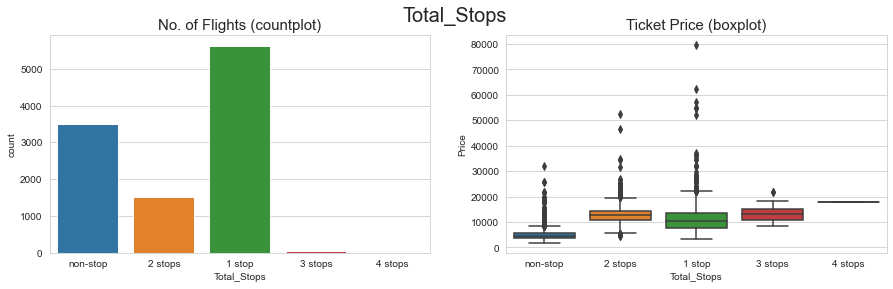

In [27]:
# Total_Stops
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Total_Stops', fontsize = 20)

sns.countplot(ax=axes[0], x='Total_Stops',data=train_df)
axes[0].set_title('No. of Flights (countplot)', fontsize = 15)

sns.boxplot(ax=axes[1], x='Total_Stops', y='Price' ,data=train_df)
axes[1].set_title('Ticket Price (boxplot)', fontsize = 15)

In [28]:
train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
train_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Days_of_Week,Week,Month
0,IndiGo,Banglore,New Delhi,1340,70,170,0,3897,24,Sunday,12,3
1,Air India,Kolkata,Banglore,350,795,445,2,7662,5,Saturday,1,1
2,Jet Airways,Delhi,Cochin,565,265,1140,2,13882,6,Friday,36,9
3,IndiGo,Kolkata,Banglore,1085,1410,325,1,6218,5,Thursday,49,12
4,IndiGo,Banglore,New Delhi,1010,1295,285,1,13302,3,Thursday,1,1


Text(0.5, 1.0, 'Ticket Price (boxplot)')

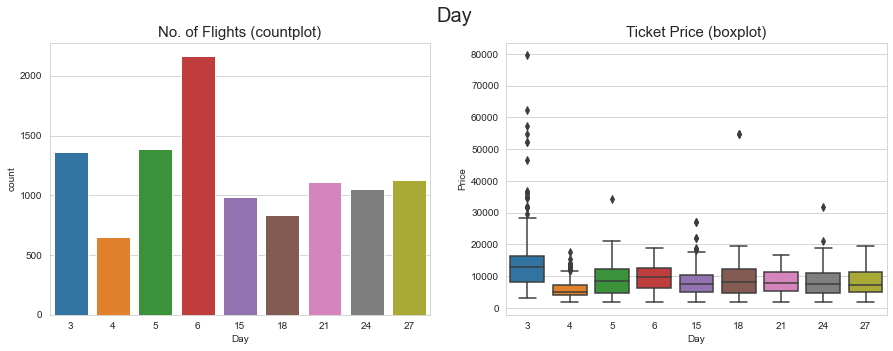

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Day', fontsize = 20)

sns.countplot(ax=axes[0], x='Day',data=train_df)
axes[0].set_title('No. of Flights (countplot)', fontsize = 15)

sns.boxplot(ax=axes[1], x='Day', y='Price' ,data=train_df)
axes[1].set_title('Ticket Price (boxplot)', fontsize = 15)

Text(0.5, 1.0, 'Ticket Price (boxplot)')

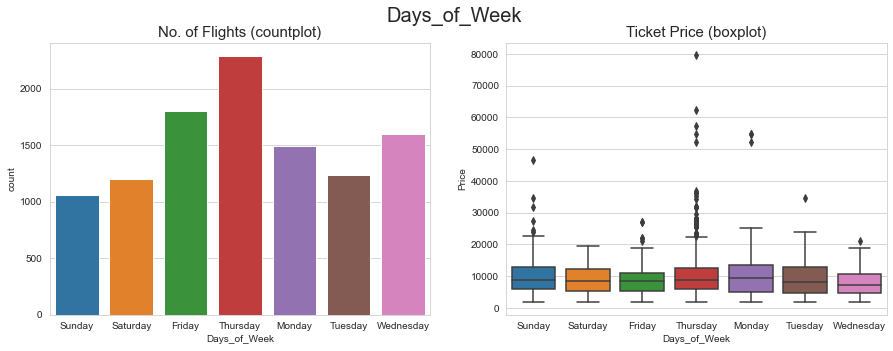

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Days_of_Week', fontsize = 20)

sns.countplot(ax=axes[0], x='Days_of_Week',data=train_df)
axes[0].set_title('No. of Flights (countplot)', fontsize = 15)

sns.boxplot(ax=axes[1], x='Days_of_Week', y='Price' ,data=train_df)
axes[1].set_title('Ticket Price (boxplot)', fontsize = 15)

In [31]:
# Days_of_Week ---> Ordinal data ---> manually label encoding 
train_df.replace({"Sunday": 0, "Monday": 1, "Tuesday": 2, "Wednesday": 3,
                  "Thursday": 4, "Friday": 5, "Saturday": 6}, inplace = True)
train_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Days_of_Week,Week,Month
0,IndiGo,Banglore,New Delhi,1340,70,170,0,3897,24,0,12,3
1,Air India,Kolkata,Banglore,350,795,445,2,7662,5,6,1,1
2,Jet Airways,Delhi,Cochin,565,265,1140,2,13882,6,5,36,9
3,IndiGo,Kolkata,Banglore,1085,1410,325,1,6218,5,4,49,12
4,IndiGo,Banglore,New Delhi,1010,1295,285,1,13302,3,4,1,1


Text(0.5, 1.0, 'Ticket Price (boxplot)')

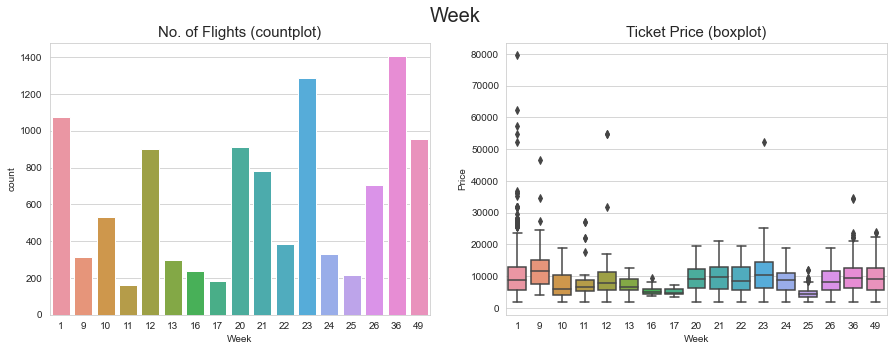

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Week', fontsize = 20)

sns.countplot(ax=axes[0], x='Week',data=train_df)
axes[0].set_title('No. of Flights (countplot)', fontsize = 15)

sns.boxplot(ax=axes[1], x='Week', y='Price' ,data=train_df)
axes[1].set_title('Ticket Price (boxplot)', fontsize = 15)

Text(0.5, 1.0, 'Ticket Price (boxplot)')

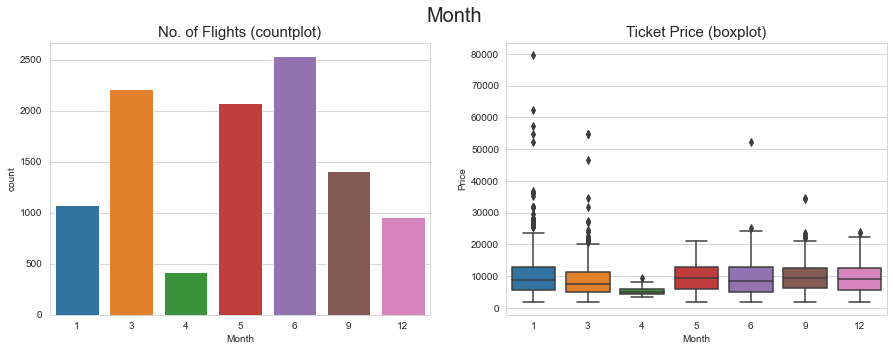

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Month', fontsize = 20)

sns.countplot(ax=axes[0], x='Month',data=train_df)
axes[0].set_title('No. of Flights (countplot)', fontsize = 15)

sns.boxplot(ax=axes[1], x='Month', y='Price' ,data=train_df)
axes[1].set_title('Ticket Price (boxplot)', fontsize = 15)

In [34]:
# Concatenate dataframe --> train_df + Airline + Source + Destination
train_df = pd.concat([train_df, Airline, Source, Destination], axis = 1)

In [35]:
train_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Days_of_Week,Week,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,1340,70,170,0,3897,24,0,12,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,350,795,445,2,7662,5,6,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,565,265,1140,2,13882,6,5,36,9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1085,1410,325,1,6218,5,4,49,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1010,1295,285,1,13302,3,4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
train_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
train_df.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Days_of_Week,Week,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1340,70,170,0,3897,24,0,12,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,350,795,445,2,7662,5,6,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,565,265,1140,2,13882,6,5,36,9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1085,1410,325,1,6218,5,4,49,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1010,1295,285,1,13302,3,4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
cols = [col for col in train_df if col != 'Price'] + ['Price']
train_df = train_df[cols]

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_df['Dep_Time'] = scaler.fit_transform(np.array(train_df['Dep_Time']).reshape(-1, 1))
train_df['Arrival_Time'] = scaler.fit_transform(np.array(train_df['Arrival_Time']).reshape(-1, 1))
train_df['Duration'] = scaler.fit_transform(np.array(train_df['Duration']).reshape(-1, 1))

In [39]:
train_df.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Day,Days_of_Week,Week,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,1.641150,-1.846105,-0.931498,0,24,0,12,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3897
1,-1.228754,-0.074861,-0.389953,2,5,6,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7662
2,-0.605492,-1.369701,0.978679,2,6,5,36,9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13882
3,0.901933,1.427643,-0.626263,1,5,4,49,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6218
4,0.684516,1.146687,-0.705034,1,3,4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13302


In [40]:
train_df.tail()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Day,Days_of_Week,Week,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
10677,1.220811,1.268842,-0.970883,0,4,3,36,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4107
10678,1.365755,1.403212,-0.961037,0,27,6,17,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4145
10679,-0.793920,-0.355817,-0.911805,0,27,6,17,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7229
10680,-0.243130,0.059510,-0.951190,0,3,4,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12648
10681,-0.344592,0.804654,-0.281644,2,5,4,36,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11753


### Testing Dataset : test_df

In [41]:
# drop row with NaN/non-null values.
test_df.dropna(inplace=True)

# converting ['Date_of_Journey'] from 'object' to 'datetime64'.
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])

# dropping column ['Route'].
test_df.drop(['Route'],axis=1,inplace=True)

# Handling Categorical Data
# As Source is Nominal Categorical data we will perform OneHotEncoding
Airline = pd.DataFrame(One_Hot_Encoder.fit_transform(test_df[["Airline"]]).toarray())
Airline.columns = One_Hot_Encoder.get_feature_names(['Airline'])
Airline.head()

# splitting ['Date_of_Journey'] into day, week, month, year.
test_df['Day'] = test_df['Date_of_Journey'].dt.day
test_df['Days_of_Week'] = test_df['Date_of_Journey'].dt.day_name()
test_df['Week'] = test_df['Date_of_Journey'].dt.week
test_df['Month'] = test_df['Date_of_Journey'].dt.month

test_df.drop(['Date_of_Journey'],axis=1,inplace=True)

# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = pd.DataFrame(One_Hot_Encoder.fit_transform(test_df[["Source"]]).toarray())
Source.columns = One_Hot_Encoder.get_feature_names(['Source'])
Source.head()

# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.DataFrame(One_Hot_Encoder.fit_transform(test_df[["Destination"]]).toarray())
Destination.columns = One_Hot_Encoder.get_feature_names(['Destination'])
Destination.head()

# Converting [Dep_Time, Arrival_Time, Duration] into minutes.
test_df.Dep_Time = test_df.Dep_Time.str.split(':').apply(lambda x: int(x[0])*60+int(x[1]))
test_df.Arrival_Time = [ int(x[0])*60+int(x[1])   for x in test_df.Arrival_Time.str.split(' ').str[0].str.split(':')]
test_df['Duration']=test_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

test_df.drop(['Additional_Info'], axis=1, inplace=True)

test_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Days_of_Week ---> Ordinal data ---> manually label encoding 
test_df.replace({"Sunday": 0, "Monday": 1, "Tuesday": 2, "Wednesday": 3,
                  "Thursday": 4, "Friday": 5, "Saturday": 6}, inplace = True)

# Concatenate dataframe --> test_df + Airline + Source + Destination
test_df = pd.concat([test_df, Airline, Source, Destination], axis = 1)

test_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

# StandardScaler
test_df['Dep_Time'] = scaler.fit_transform(np.array(test_df['Dep_Time']).reshape(-1, 1))
test_df['Arrival_Time'] = scaler.fit_transform(np.array(test_df['Arrival_Time']).reshape(-1, 1))
test_df['Duration'] = scaler.fit_transform(np.array(test_df['Duration']).reshape(-1, 1))

test_df.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Day,Days_of_Week,Week,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.788529,-1.366994,0.030389,1,6,4,23,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.176215,-0.522537,-0.796151,1,5,4,49,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.096437,0.714414,1.563970,1,21,2,21,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.882969,0.999864,0.279347,1,21,2,21,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.917524,-1.604869,-0.935567,0,24,1,26,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
print('train_df Shape: ', train_df.shape)  
print('test_df Shape: ', test_df.shape)  

train_df Shape:  (10682, 32)
test_df Shape:  (2671, 30)


In [43]:
# Columns which are in train_df but not in test_df excluding Price(target variable), due to OneHotEncoding.
train_columns = train_df.columns.tolist()
test_columns = test_df.columns.tolist()

for col_name in train_columns:
    if (col_name not in test_columns) and (col_name != 'Price'):
        print(col_name)

Airline_Trujet


In [44]:
# Columns which are in test_df but not in train_df excluding Price(target variable), due to OneHotEncoding.
train_columns = train_df.columns.tolist()
test_columns = test_df.columns.tolist()

for col_name in test_columns:
    if (col_name not in train_columns) and (col_name != 'Price'):
        print(col_name)

In [45]:
# Making missing columns in test_df. 
train_columns = train_df.columns.tolist()
test_columns = test_df.columns.tolist()

for col_name in train_columns:
    if (col_name not in test_columns) and (col_name != 'Price'):
        test_df[col_name] = 0
test_df.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Day,Days_of_Week,Week,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Trujet
0,0.788529,-1.366994,0.030389,1,6,4,23,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-1.176215,-0.522537,-0.796151,1,5,4,49,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,1.096437,0.714414,1.563970,1,21,2,21,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,-0.882969,0.999864,0.279347,1,21,2,21,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,1.917524,-1.604869,-0.935567,0,24,1,26,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [46]:
print('train_df Shape: ', train_df.shape)  
print('test_df Shape: ', test_df.shape)  

train_df Shape:  (10682, 32)
test_df Shape:  (2671, 31)


In [47]:
# arranging test_df columns in sequence of train_df columns.
test_df = test_df[train_columns[:-1]]
test_df.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Day,Days_of_Week,Week,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.788529,-1.366994,0.030389,1,6,4,23,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.176215,-0.522537,-0.796151,1,5,4,49,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.096437,0.714414,1.563970,1,21,2,21,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.882969,0.999864,0.279347,1,21,2,21,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.917524,-1.604869,-0.935567,0,24,1,26,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods:

* heatmap

* feature_importance_

* SelectKBest

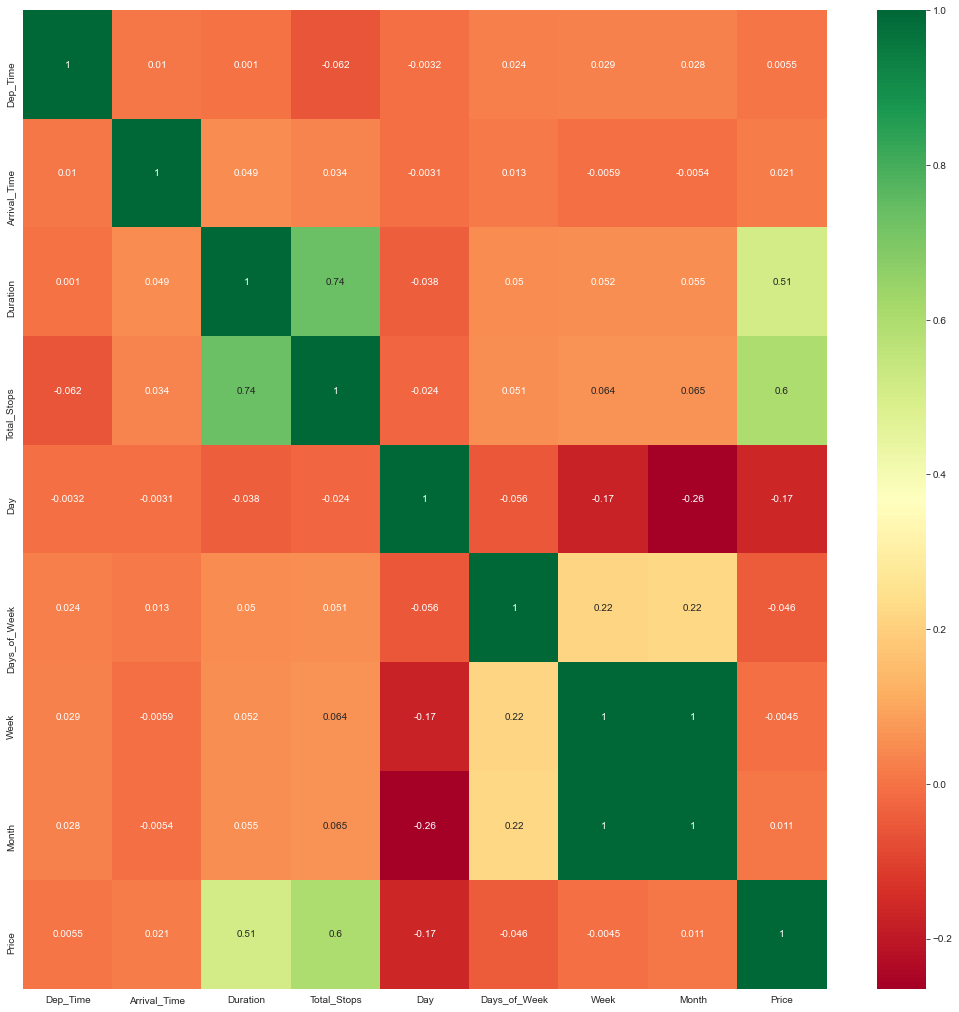

In [48]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_df[['Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Day',
       'Days_of_Week', 'Week', 'Month','Price']].corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [49]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
x, y = train_df.iloc[:,:-1] , train_df.iloc[:,-1] 
selection.fit(x, y)

ExtraTreesRegressor()

In [50]:
print(selection.feature_importances_)

[4.40141800e-02 4.70719302e-02 1.46822644e-01 2.26702341e-01
 8.15207558e-02 4.08607356e-02 3.52067025e-02 3.63825980e-02
 2.17968787e-03 9.76432423e-03 2.15346979e-03 1.51363362e-02
 1.38925990e-01 6.71244331e-02 2.02973979e-02 8.69130976e-04
 2.83547641e-03 9.98603754e-05 5.09155453e-03 1.23393713e-04
 7.72857941e-03 6.08811495e-04 8.06253106e-03 2.83921657e-03
 7.19302665e-03 2.31846999e-03 1.06803116e-02 1.46372590e-02
 5.52022100e-03 4.26854266e-04 1.68017771e-02]


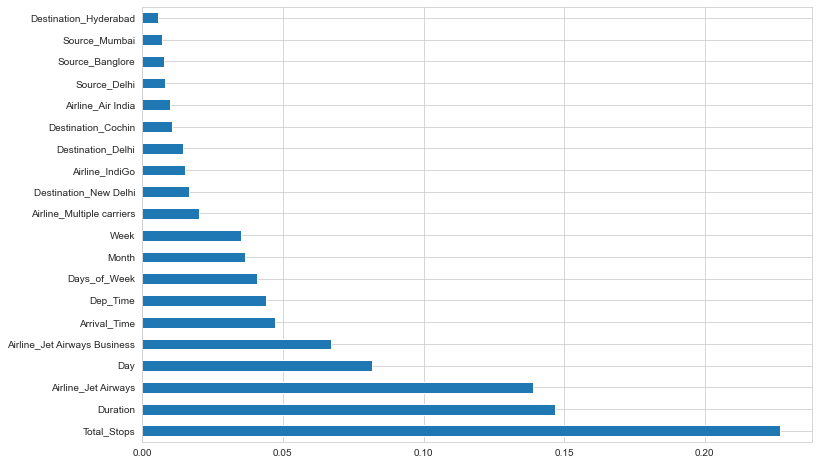

In [51]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## ML Model selection based on r2_score:
 Applying Different regressions to check the r2_score to see which one is appropriate

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
! pip install xgboost
import xgboost as xgb

In [54]:
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import cross_val_score

In [55]:
regg_models = [LinearRegression(), Lasso(), Ridge(), SVR(),
               RandomForestRegressor(), DecisionTreeRegressor(), xgb.XGBRegressor()]

In [56]:
mean=[]
std=[]
for i in regg_models:
    cvs=cross_val_score(i,x,y,cv=5,scoring=make_scorer(r2_score))
    mean.append(np.mean(cvs))
    std.append(np.std(cvs))

C:\Users\kakadiya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504087969.50994873, tolerance: 17933681.09419209
  model = cd_fast.enet_coordinate_descent(
C:\Users\kakadiya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27220764231.59097, tolerance: 17990789.06961287
  model = cd_fast.enet_coordinate_descent(
C:\Users\kakadiya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23682721900.962727, tolerance: 18182450.076523144
  model = cd_fast.enet_coordinate_descent(
C:\Users\kakadiya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Co

In [57]:
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',mean[i])

LinearRegression : 0.6184949077970708
Lasso : 0.6185649324361406
Ridge : 0.6176479032100167
SVR : -0.017172325632821516
RandomForestRegressor : 0.7969668695779858
DecisionTreeRegressor : 0.6847588134204246
XGBRegressor : 0.8318604756639694


### RandomForestRegressor

In [58]:
RFR_model = RandomForestRegressor()
RFR_model.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
y_pred = RFR_model.predict(x_test)

In [60]:
RFR_model.score(x_train, y_train)

0.9509582275104813

In [61]:
RFR_model.score(x_test, y_test)

0.8179730290931926

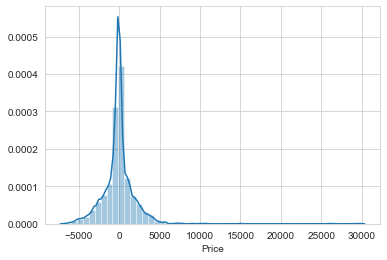

In [62]:
# Residual Histogram
sns.distplot(y_test-y_pred)
plt.show()

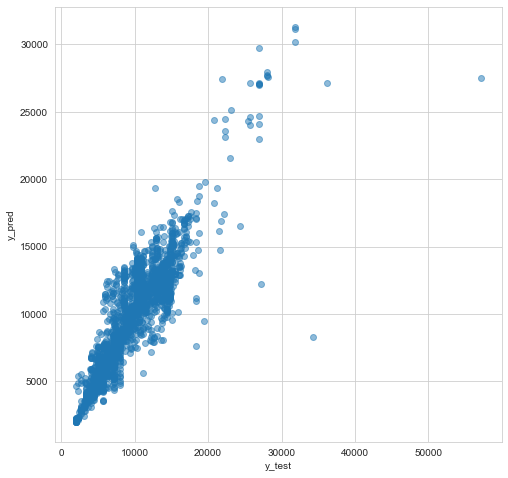

In [63]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [64]:
# Regression Evaluation Metrics:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))
print('r2_score:', RFR_model.score(x_test, y_test))

MAE: 1188.1571097388419
MSE: 3924875.79920914
RMSE: 1981.1299299160416
r2_score: 0.8179730290931926
r2_score: 0.8179730290931926


#### Hyperparameter Tuning
* Choose following method for hyperparameter tuning
 1. RandomizedSearchCV --> Fast
 2. GridSearchCV
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [67]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [68]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
RFR_model_RandomizedSearchCV = RandomizedSearchCV(estimator = RFR_model, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = 1)

In [69]:
RFR_model_RandomizedSearchCV.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
RFR_model_RandomizedSearchCV.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [71]:
y_pred = RFR_model_RandomizedSearchCV.predict(x_test)

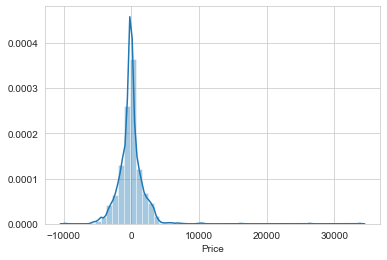

In [72]:
sns.distplot(y_test-y_pred)
plt.show()

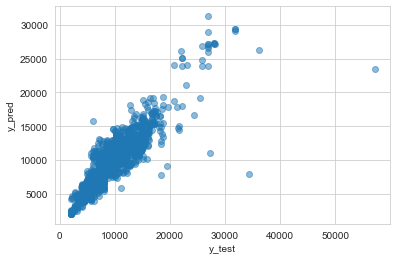

In [73]:
plt.figure(figsize = (6,4))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [74]:
# Regression Evaluation Metrics:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))

MAE: 1164.9242031034266
MSE: 3711547.7932163198
RMSE: 1926.5377736282046
r2_score: 0.8278667054098513


### XGB Regressor

In [75]:
XGBregg_model = xgb.XGBRegressor()
XGBregg_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
y_pred = XGBregg_model.predict(x_test)

In [77]:
XGBregg_model.score(x_train, y_train)

0.9325500802238682

In [78]:
XGBregg_model.score(x_test, y_test)

0.8387592587417352

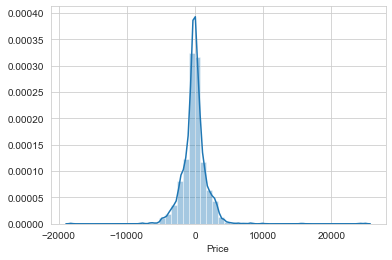

In [79]:
# Residual Histogram
sns.distplot(y_test-y_pred)
plt.show()

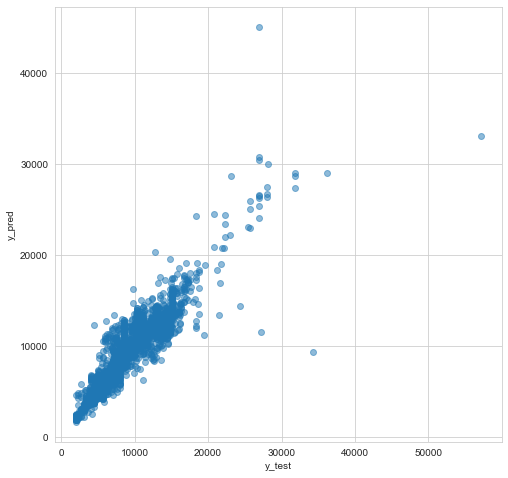

In [80]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [81]:
# Regression Evaluation Metrics:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))
print('r2_score:', XGBregg_model.score(x_test, y_test))

MAE: 1178.6344767005073
MSE: 3476681.9447603044
RMSE: 1864.5862663766202
r2_score: 0.8387592587417352
r2_score: 0.8387592587417352


#### Hyperparameter Tuning

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
#Randomized Search CV

n_estimators = [int(i) for i in np.linspace(100,1200,num=12)]
learning_rate = [0.2,0.3,0.4,0.5,0.6]
max_depth = [int(i) for i in np.linspace(5,40,num=8)]
min_child_weight = [3,5,6,8,7]
subsample = [0.4,0.5,0.7,0.8,0.9]

In [103]:
random_grid = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'learning_rate' : learning_rate,
             'min_child_weight': min_child_weight,
             'subsample':subsample}

In [104]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
XGBregg_model_RandomizedSearchCV = RandomizedSearchCV(estimator = XGBregg_model, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = 1)

In [105]:
XGBregg_model_RandomizedSearchCV.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.4, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.4, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.5, total=   2.2s
[CV] subsample=0.4, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  subsample=0.4, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.5, total=   2.1s
[CV] subsample=0.4, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.4, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.5, total=   2.1s
[CV] subsample=0.4, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.4, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.5, total=   2.4s
[CV] subsample=0.4, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.4, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.5, total=   2.0s
[CV] subsample=0.4, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.2 
[CV]  subsample=0.4, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.2, total=   9.2s
[CV] subsample=0.4, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.2 
[CV]  subsample=0.4, n

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.7min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_par...
                                          tree_method='exact',
                                          validate_parameters=1,
                   

In [106]:
XGBregg_model_RandomizedSearchCV.score(x_train,y_train),XGBregg_model_RandomizedSearchCV.score(x_test,y_test)

(-659986.5476222466, -5760151.940121263)

In [107]:
XGBregg_model_RandomizedSearchCV.best_params_ , XGBregg_model_RandomizedSearchCV.best_score_

({'subsample': 0.9,
  'n_estimators': 700,
  'min_child_weight': 3,
  'max_depth': 20,
  'learning_rate': 0.4},
 -5903647.22923453)

In [108]:
y_pred = XGBregg_model_RandomizedSearchCV.predict(x_test)

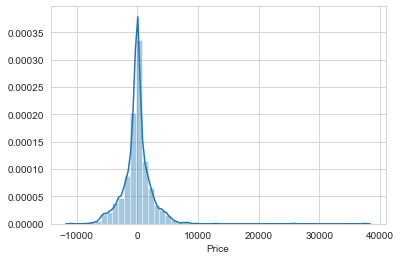

In [109]:
sns.distplot(y_test-y_pred)
plt.show()

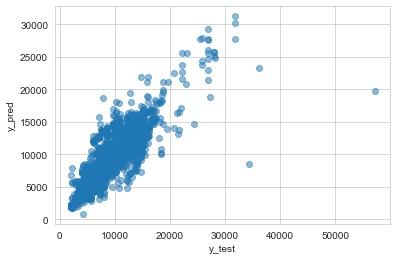

In [110]:
plt.figure(figsize = (6,4))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [111]:
# Regression Evaluation Metrics:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))

MAE: 1512.753737367979
MSE: 5760151.940121263
RMSE: 2400.031653983185
r2_score: 0.7328570219127657


Selecting RandomForestRegressor with hyperparameter tuning, as it gives best results.

## Flight Ticket Price Prediction using test data:
1. Training RandomForestRegressor model with Hyperparameter Tuning(RandomizedSearchCV) on 100% of traing data(x) & not on 80% of traing data(x_train) for more accuracy.
2. Predict The Flight Ticket Price using test data (test_df).

In [82]:
RFR_model_RandomizedSearchCV.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
testing_data = test_df

In [85]:
testing_data.shape

(2671, 31)

In [86]:
testing_data.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Day,Days_of_Week,Week,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.788529,-1.366994,0.030389,1,6,4,23,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.176215,-0.522537,-0.796151,1,5,4,49,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.096437,0.714414,1.563970,1,21,2,21,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.882969,0.999864,0.279347,1,21,2,21,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.917524,-1.604869,-0.935567,0,24,1,26,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [87]:
RFR_model_RandomizedSearchCV.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [88]:
Prediction = RFR_model_RandomizedSearchCV.predict(testing_data)

In [89]:
Prediction

array([11405.50307264,  4524.11509586, 14024.51711755, ...,
       15833.29353697, 12862.45614405,  9947.58592923])

In [92]:
Prediction = pd.DataFrame({'Price':Prediction})

In [95]:
print(Prediction.shape)
Prediction.head()

(2671, 1)


,Price
0,11405.503073
1,4524.115096
2,14024.517118
3,10757.600993
4,3699.709060


Saving the Prediction as a excel file.

In [97]:
Prediction.to_excel(r'C:\Users\kakadiya\Downloads\machinehack.com\Prediction_Submission_RFR_model_RandomizedSearchCV.xlsx',
                    index = False)

### Conclusion:

We successfully completed data cleaning/wrangling, EDA, feature selection, ML Model selection & finally Flight fare prediction. We compared r2_score of various Models(LinearRegression ,Lasso ,Ridge ,SVR ,RandomForestRegressor ,DecisionTreeRegressor ,XGBRegressor) using Sklearn's 'Cross Validation Score'.  RandomForestRegressor with Hyperparameter Tuning was selected as it was giving the best r2_score. Predicted price(output )  was transformed into pandas dataframe & then in excel file format which later uploaded on Hackathon portal (https://www.machinehack.com/hackathons/predict_the_flight_ticket_price_hackathon/overview). 

We successfully secured **228 Rank** (28/12/2020) in Hackathon with 2600+ participants!!
 